# Sentimental Analysis on Twitter Data

### The notebook walks you through the step-by-step process of performing sentiment analysis using python

The Twitter Data contains the following 6 fields:

#### 1. target: the polarity of the tweet(0 = negative, 2= neutral , 4= positive)

#### 2. ids: The id of the tweet

#### 3. date: the date of the tweet

#### 4. flag:  The query: If there is no query , then this value is NO_QUERY

#### 5. user: the user that retweeted

#### 6. text: the text of the tweet



# Step1: Importing Libraries

In [114]:
## importing libraries
## data manipulation packages

import pandas as pd
import numpy as np
import re
import string


## Methods and stopword text processing

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Machine Learning Libraries

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# English Stopwords

In [115]:
#  Creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lalit\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step2: Load the dataset 

In [116]:
def load_dataset(file_path , cols):
    """
    reads the CSV File to return
    a dataframe with specified column name
    """
    
    df = pd.read_csv(file_path,  encoding="latin-1")
    df.columns = cols
    return df
    

# Getting rid of unwanted columns (Helper function)

In [117]:
def delete_redundant_cols(df, cols):
    """
    Deletes unwanted columns(cols) from the
    dataframe. 
    """
    for col in cols:
        del df[col]
    return df

# Preprocessing the Tweet Text
  1. Casing
  2. Noise Removal
  3. Tokenization
  4. Stopword Removal
  5. Text Normalization(Stemming and Lemmatization)

In [118]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lalit\anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [119]:
 def preprocess_tweet_text(tweet):
    """
    Runs a set of transformational steps to
    preprocess the text of the tweet.
    """
    
    # convert all text lowercase
    tweet = tweet.lower()
    
    # remove any urls
    tweet = re.sub(r"http\S+|www\S+|https\S+","", tweet,flags=re.MULTILINE)
    
    # remove punctuations
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))
    
    # remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    
    
    #remove numbers 
    
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    # stemming
    ps = PorterStemmer()
    # Apply stemming to each word in the text
    stemmed_words = [ps.stem(w) for w in filtered_words]

  

    # lemmatizing
    
    # Create a WordNet Lemmatizer instance
    lemmatizer = WordNetLemmatizer()
    # Apply lemmatization to each word in the text
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)
   

# Vectorizing Tokens

In [120]:
def get_feature_vector(train_fit):
    """
    Returns TF-IDF feature vectors based on the training data.
    """
    vectorizer = TfidfVectorizer(sublinear_tf=True)
    vectorizer.fit(train_fit)
    return vectorizer

#  Load dataset

In [121]:
# Load dataset
file_path = 'Twitter_Sentiments.csv'  # Replace with the actual path to your dataset


# Assuming you want to use the first row as column names
cols = ['target', 'ids', 'date', 'flag', 'user', 'text']  # Replace with your actual column names

df = load_dataset(file_path, cols)



df.head()
# # Delete redundant columns if needed
# redundant_cols = ['ids', 'date', 'flag', 'user']  # Replace with the columns you want to delete if any
# df = delete_redundant_cols(df, redundant_cols)




,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Selecting the text and Target column for our further analysis
 Selecting the text and Target column for our further analysis

In [122]:
df=df[['text','target']]

In [123]:
df['target'] = df['target'].replace(4,1)

In [124]:
df['target'].unique()

array([0, 1], dtype=int64)

Separating positive and negative tweets

In [125]:
data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]

In [126]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [127]:
df = pd.concat([data_pos, data_neg])

In [128]:
# Preprocess the text
df['cleaned_tweet'] = df['text'].apply(preprocess_tweet_text)

In [129]:
df.head()

,text,target,cleaned_tweet
799999,I LOVE @Health4UandPets u guys r the best!!,1,love healthuandpet u guy r best
800000,im meeting up with one of my besties tonight! ...,1,im meet one besti tonight cant wait girl talk
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,darealsunisakim thank twitter add sunisa got m...
800002,Being sick can be really cheap when it hurts t...,1,sick realli cheap hurt much eat real food plu ...
800003,@LovesBrooklyn2 he has that effect on everyone,1,lovesbrooklyn effect everyon


In [130]:
df.columns

Index(['text', 'target', 'cleaned_tweet'], dtype='object')

In [131]:
print('length of data is', len(df))

length of data is 40000


In [132]:
df. shape

(40000, 3)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 799999 to 19999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           40000 non-null  object
 1   target         40000 non-null  int64 
 2   cleaned_tweet  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# Checking for null values

In [134]:
np.sum(df.isnull().any(axis=1))

0

In [135]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   40000


In [136]:
df['target'].unique()

array([1, 0], dtype=int64)

In [137]:
df['target'].nunique()

2

# Data Visualization of Target Variables

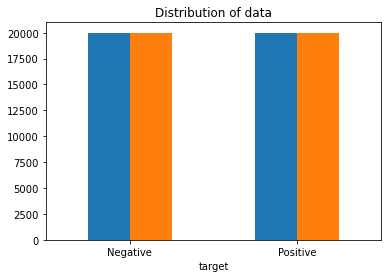

In [138]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, cleaned_tweet = list(df['cleaned_tweet']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

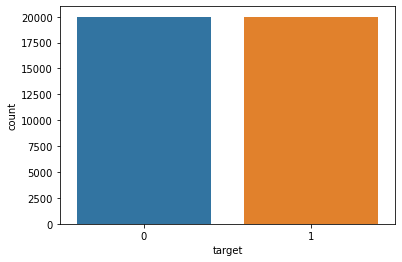

In [139]:
import seaborn as sns
sns.countplot(x='target', data=df)

# Visualize word frequency using word cloud

In [140]:
!pip install wordcloud

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize word frequency using Word Cloud
all_tweets = " ".join(sentence for sentence in df['cleaned_tweet'])



wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110).generate(all_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


ValueError: Only supported for TrueType fonts

In [262]:
print(df.head())

                                                     text  target  \
799999       I LOVE @Health4UandPets u guys r the best!!        1   
800000  im meeting up with one of my besties tonight! ...       1   
800001  @DaRealSunisaKim Thanks for the Twitter add, S...       1   
800002  Being sick can be really cheap when it hurts t...       1   
800003    @LovesBrooklyn2 he has that effect on everyone        1   

                                            cleaned_tweet  
799999                    love healthuandpet u guy r best  
800000      im meet one besti tonight cant wait girl talk  
800001  darealsunisakim thank twitter add sunisa got m...  
800002  sick realli cheap hurt much eat real food plu ...  
800003                       lovesbrooklyn effect everyon  


# Print cleaned preprocessed tweets

In [263]:
# Split the dataset into features and target variable
X = df['cleaned_tweet']
y = df['target']  # Assuming 'target' contains the sentiment labels

In [264]:
X.head()

799999                      love healthuandpet u guy r best
800000        im meet one besti tonight cant wait girl talk
800001    darealsunisakim thank twitter add sunisa got m...
800002    sick realli cheap hurt much eat real food plu ...
800003                         lovesbrooklyn effect everyon
Name: cleaned_tweet, dtype: object

In [265]:
y.head()

799999    1
800000    1
800001    1
800002    1
800003    1
Name: target, dtype: int64

In [266]:
import matplotlib.pyplot as plt

data_neg = df['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

ValueError: Only supported for TrueType fonts

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [267]:
# Get TF-IDF feature vectors
tfidf_vectorizer = get_feature_vector(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [268]:
# # Train a Naive Bayes classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_tfidf, y_train)

In [269]:
# # Train a SVC Classifier
# from sklearn.svm import LinearSVC

# classifier = LinearSVC()
# classifier.fit(X_train_tfidf, y_train)

In [270]:
# # Train a Logistic regression Classifier

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
classifier.fit(X_train_tfidf, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of tweets for visualization (e.g., first 100)
subset_tweets = df['cleaned_tweet'][:100]

# Make predictions on the selected tweets
predicted_sentiments = classifier.predict(tfidf_vectorizer.transform(subset_tweets))

# Map sentiment labels for visualization
sentiment_labels = {0: 'Negative', 2: 'Neutral', 1: 'Positive'}
predicted_sentiments_labels = [sentiment_labels[sentiment] for sentiment in predicted_sentiments]

# Create a DataFrame for visualization
plot_data = pd.DataFrame({'Tweet': subset_tweets, 'Sentiment': predicted_sentiments_labels})

# Use a custom color palette
custom_palette = {"Negative": "red", "Neutral": "gray", "Positive": "green"}

# Plot tweets with predicted sentiments
plt.figure(figsize=(12, 8))
sns.scatterplot(x=plot_data['Sentiment'], y=plot_data['Tweet'], hue=plot_data['Sentiment'], palette=custom_palette, s=100)
plt.title('Tweets with Predicted Sentiments')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Tweet')
plt.show()



In [360]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Select a random subset of 10 tweets for visualization
random_subset_tweets = df.sample(n=10, random_state=random.randint(1, 1000))

# Make predictions on the selected tweets
predicted_sentiments = classifier.predict(tfidf_vectorizer.transform(random_subset_tweets['text'].apply(preprocess_tweet_text)))

# Map sentiment labels for visualization
sentiment_labels = {0: 'Negative', 2: 'Neutral', 1: 'Positive'}
predicted_sentiments_labels = [sentiment_labels[sentiment] for sentiment in predicted_sentiments]

# Create a DataFrame for visualization
plot_data = pd.DataFrame({'Actual Tweet': random_subset_tweets['text'],
                          'Preprocessed Tweet': random_subset_tweets['text'].apply(preprocess_tweet_text),
                          'Sentiment': predicted_sentiments_labels})

# Use a custom color palette
custom_palette = {"Negative": "red", "Neutral": "gray", "Positive": "green"}

# Plot tweets with predicted sentiments
plt.figure(figsize=(12, 8))
sns.scatterplot(x=plot_data['Sentiment'], y=plot_data['Actual Tweet'], hue=plot_data['Sentiment'], palette=custom_palette, s=100)
sns.scatterplot(x=plot_data['Sentiment'], y=plot_data['Preprocessed Tweet'], hue=plot_data['Sentiment'], palette=custom_palette, s=100, marker='x')

plt.title('Random Subset of 10 Tweets with Predicted Sentiments')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Tweet')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [334]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = classifier.predict(X_test_tfidf)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
  

In [274]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

model_Evaluate(classifier)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3986
           1       0.74      0.76      0.75      4014

    accuracy                           0.75      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.75      0.75      0.75      8000



In [249]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [250]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Accuracy: 0.758521875

Confusion Matrix:
 [[127304  32190]
 [ 45083 115423]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77    159494
           4       0.78      0.72      0.75    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Accuracy:

Accuracy Score: 0.758521875
Significance: The accuracy score represents the proportion of correctly classified instances out of the total instances in the test set. In this case, approximately 75.85% of the tweets were correctly classified.
Confusion Matrix:

Confusion Matrix:

    [[127304  32190]
    [ 45083 115423]]

Significance: The confusion matrix provides a detailed breakdown of correct and incorrect predictions. It is structured as follows:

1. True Positive (TP): 115,423 tweets were correctly predicted as positive (class 4).
2. True Negative (TN): 127,304 tweets were correctly predicted as negative (class 0).
3. False Positive (FP): 32,190 tweets were incorrectly predicted as positive.
4. False Negative (FN): 45,083 tweets were incorrectly predicted as negative.
    
-         precision    recall  f1-score   support
-  0        0.74      0.80      0.77    159494
-  4        0.78      0.72      0.75    160506





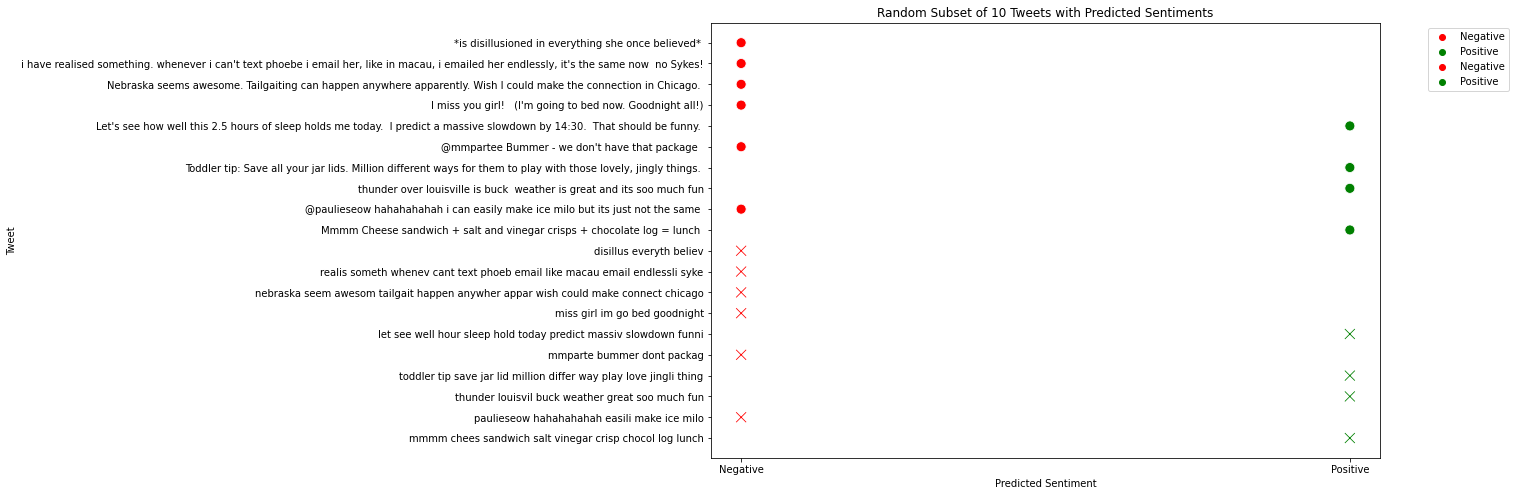